# Análisis exploratorio de los datos

Se analizan los datos para descubrir sus características principales empleando métodos de visualización de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
markets = ['market_1', 'market_2', 'market_3', 'market_4', 'market_5', 'market_6']
dfs = {f'{key}': pd.read_csv(f'data/{key}_prep.csv') for key in markets}

In [3]:
print(dfs['market_1'].head())

         date store_type    sales  discount_average  has_new_product  \
0  2021-01-02     type_3  2162.21             38.54                0   
1  2021-01-02     type_1  6311.62             34.67                0   
2  2021-01-02     type_2  2625.17             82.00                0   
3  2021-01-03     type_3  1687.20             33.43                0   
4  2021-01-03     type_1  5160.21             33.46                0   

   is_weekend    market  tavg  
0           1  market_1  17.4  
1           1  market_1  17.4  
2           1  market_1  17.4  
3           1  market_1  18.1  
4           1  market_1  18.1  


In [4]:
def plot_sum_column(df,val_col, lab_col, title, ax):
    grouped_df = df.groupby(['date', val_col])[lab_col].sum().unstack()

    for column in grouped_df.columns:
        ax.plot(grouped_df.index, grouped_df[column], label=column)
    ax.set_xlabel('Date')
    ax.set_ylabel(lab_col)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

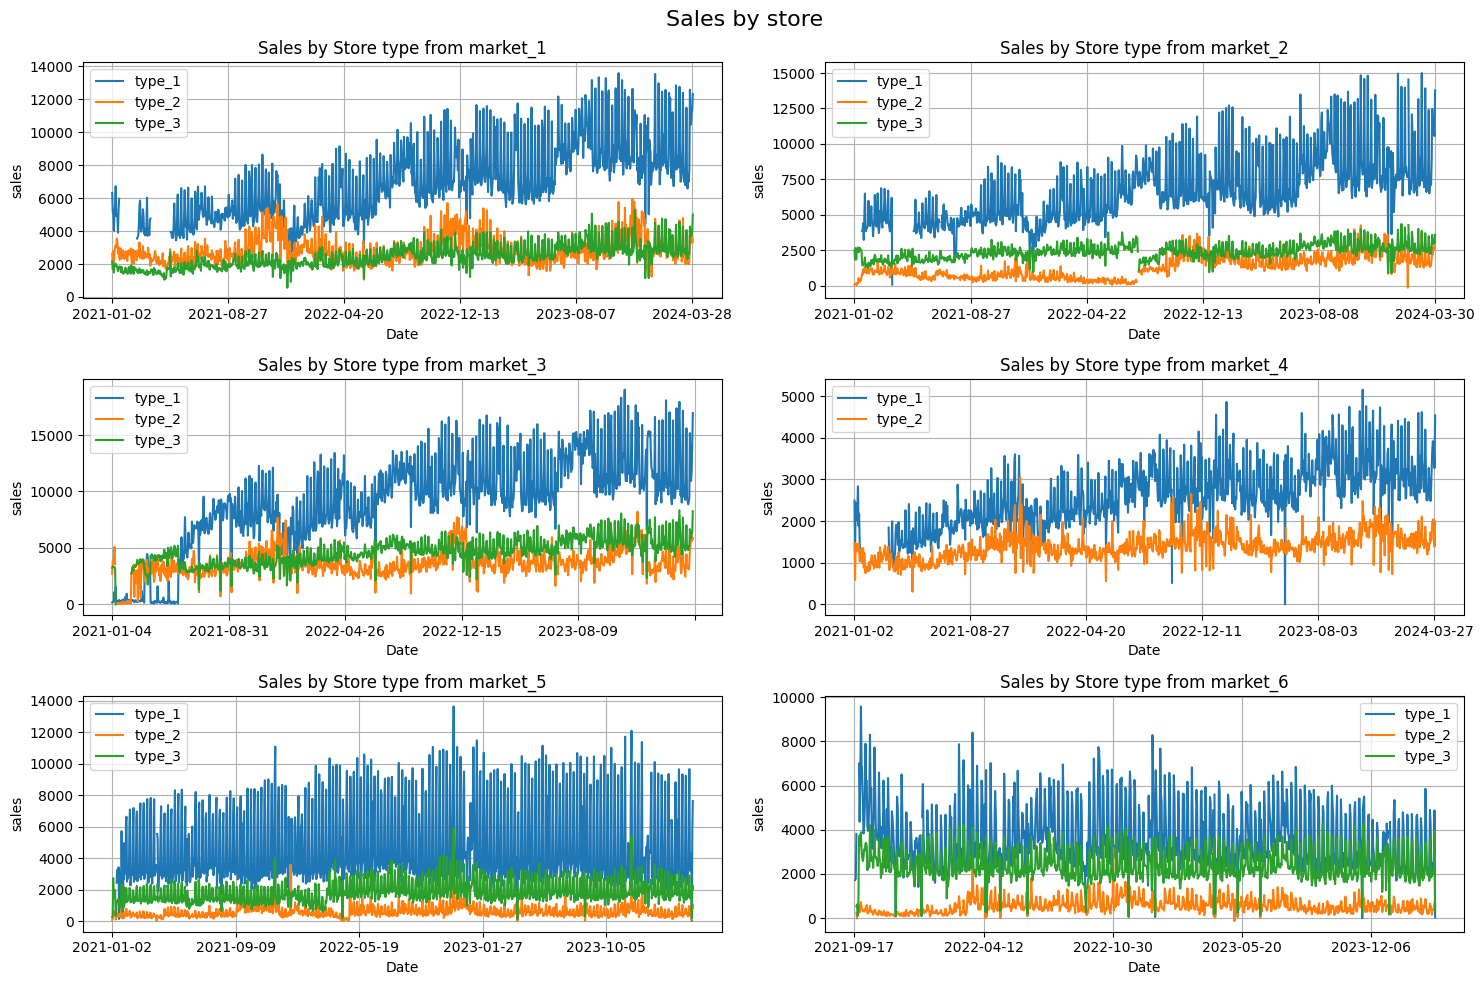

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

for i, (df_name, df) in enumerate(dfs.items()):
    row = i // 2
    col = i % 2

    x_axis = axs[row, col].get_xaxis()
    x_axis.set_major_locator(plt.MaxNLocator(6))
    plot_sum_column(df, 'store_type', 'sales', f'Sales by Store type from {df_name}',
                        axs[row, col])
fig.suptitle('Sales by store', fontsize=16)    
plt.tight_layout()
fig.savefig('figs/sales_by_store.png')
plt.show()

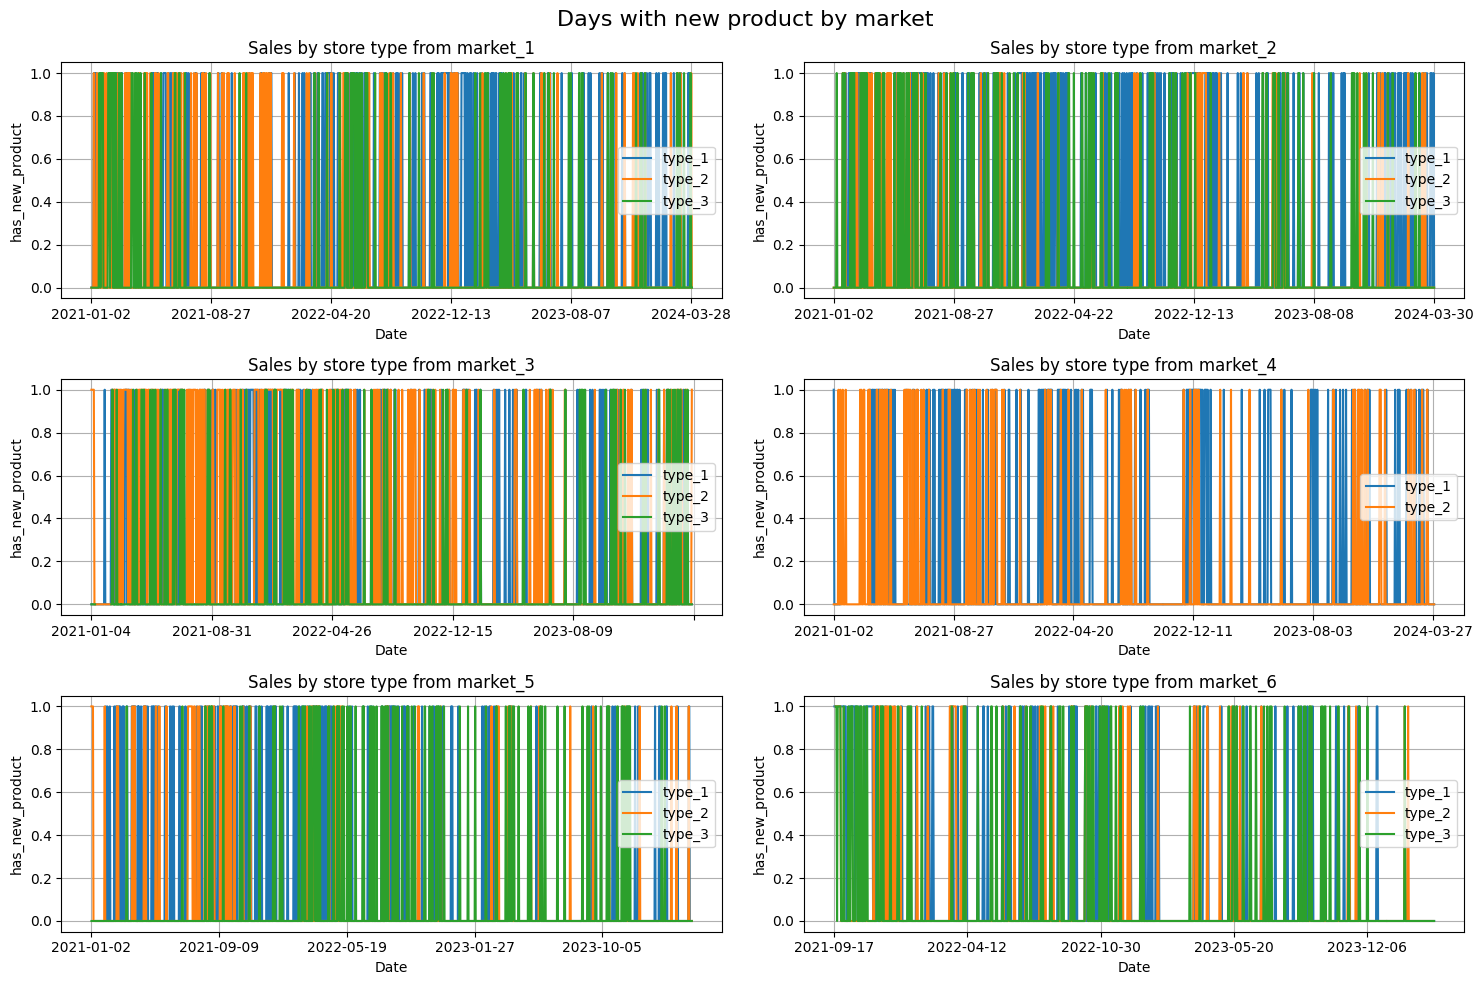

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

for i, (df_name, df) in enumerate(dfs.items()):
    row = i // 2
    col = i % 2

    x_axis = axs[row, col].get_xaxis()
    x_axis.set_major_locator(plt.MaxNLocator(6))
    plot_sum_column(df, 'store_type', 'has_new_product', f'Sales by store type from {df_name}',
                        axs[row, col])

fig.suptitle('Days with new product by market', fontsize=16)  
plt.tight_layout()

plt.show()

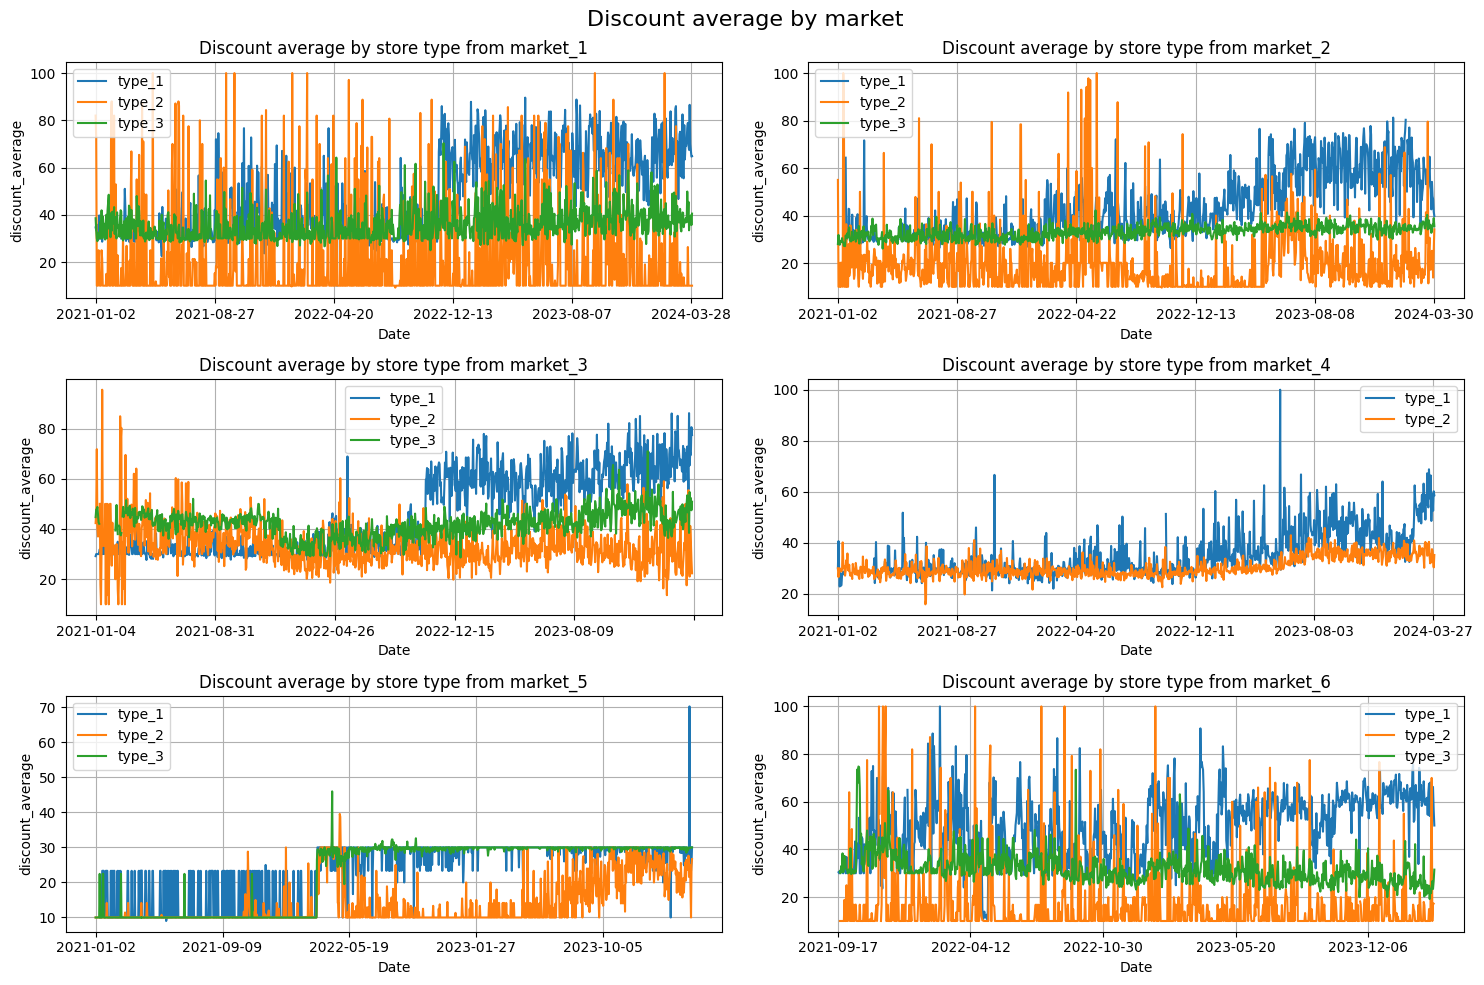

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

for i, (df_name, df) in enumerate(dfs.items()):
    row = i // 2
    col = i % 2

    x_axis = axs[row, col].get_xaxis()
    x_axis.set_major_locator(plt.MaxNLocator(6))
    plot_sum_column(df, 'store_type', 'discount_average', f'Discount average by store type from {df_name}',
                        axs[row, col])

fig.suptitle('Discount average by market', fontsize=16)  
plt.tight_layout()

plt.show()

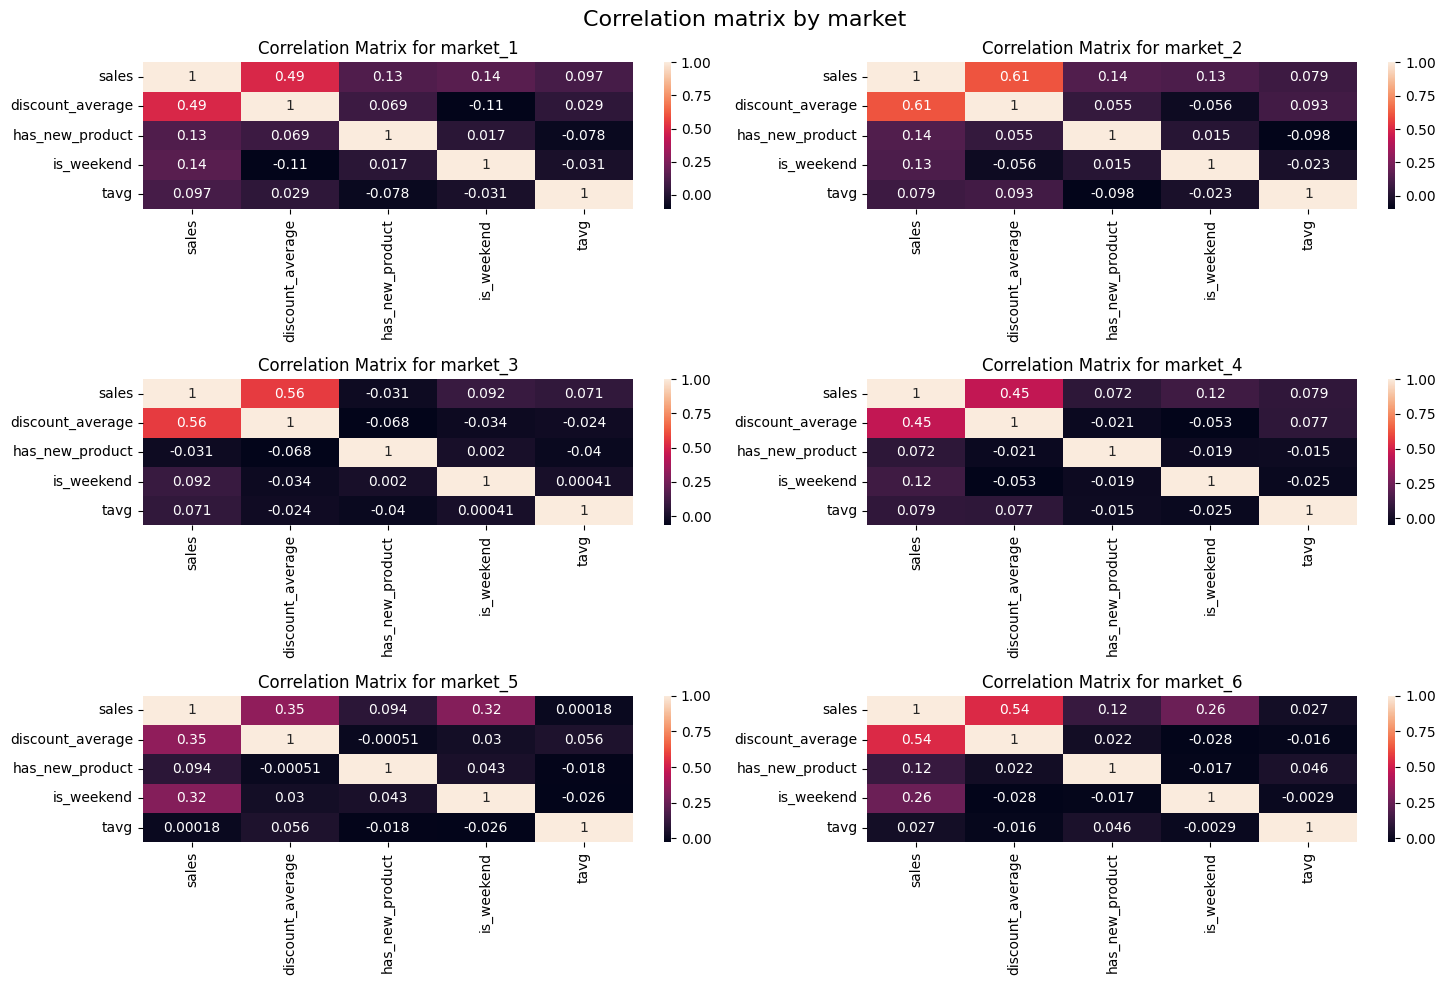

In [8]:
def plot_correlation_matrix(dfs):
    num_plots = len(dfs)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    axs = axs.flatten()

    for i, (df_name, df) in enumerate(dfs.items()):
        corr = df.drop(['date', 'market', 'store_type'], axis=1).corr()
        sns.heatmap(corr, annot=True, ax=axs[i])
        axs[i].set_title(f'Correlation Matrix for {df_name}')
    
    fig.suptitle('Correlation matrix by market', fontsize=16)  
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(dfs)